### Import libraries and load datasets

In [1]:
#import neccesary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from itertools import cycle, islice

In [2]:
#load in the dataset
df=pd.read_csv('costs.csv')
df.head()

,Unnamed: 0,Date,mode_of_purchase,sporting_equipment,store,estimated_spending,number_of_items_bought
0,0,2019-08-01,order,fitness,east,167.1768,7
1,1,2019-08-01,order,jog/run,south,297.5084,8
2,2,2019-08-01,order,pilates,south,150.5168,5
3,3,2019-08-01,order,pilates,east,91.9114,7
4,4,2019-08-01,physical_collection,diving,west,90.8194,2


In [3]:
#remove the unneccesary column
df=df.drop(columns=['Unnamed: 0'])
df.head()

,Date,mode_of_purchase,sporting_equipment,store,estimated_spending,number_of_items_bought
0,2019-08-01,order,fitness,east,167.1768,7
1,2019-08-01,order,jog/run,south,297.5084,8
2,2019-08-01,order,pilates,south,150.5168,5
3,2019-08-01,order,pilates,east,91.9114,7
4,2019-08-01,physical_collection,diving,west,90.8194,2


### Data visualizations, analysis and Feature Engineering

In [4]:
#convert date to datetime and extract month and day from it
df['Date']=pd.to_datetime(df['Date'])
df['month']=df['Date'].dt.month
df['day']=df['Date'].dt.day

In [5]:
df.head()

,Date,mode_of_purchase,sporting_equipment,store,estimated_spending,number_of_items_bought,month,day
0,2019-08-01,order,fitness,east,167.1768,7,8,1
1,2019-08-01,order,jog/run,south,297.5084,8,8,1
2,2019-08-01,order,pilates,south,150.5168,5,8,1
3,2019-08-01,order,pilates,east,91.9114,7,8,1
4,2019-08-01,physical_collection,diving,west,90.8194,2,8,1


In [6]:
#check for missing values
df.isnull().sum()

Date                      0
mode_of_purchase          0
sporting_equipment        0
store                     0
estimated_spending        0
number_of_items_bought    0
month                     0
day                       0
dtype: int64

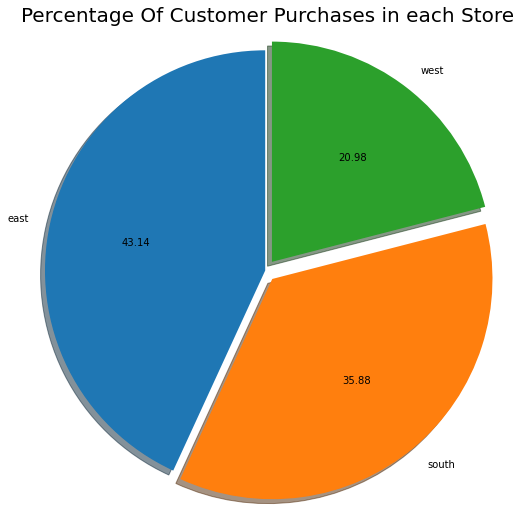

In [7]:
fig1, ax1 = plt.subplots(figsize=(9,9))
explode=(0,0.05, 0.05)
plt.pie(df['store'].value_counts(),labels=df['store'].unique(), explode=explode,shadow=True,
        startangle=90,autopct='%.2f')
ax1.axis('equal');
ax1.set_title('Percentage Of Customer Purchases in each Store',fontdict={'size':20});

#### The east store had the most purchases from customers, with almost half of the total number, coming from that store
#### West store accounted for only around 21% of the total number of purchases

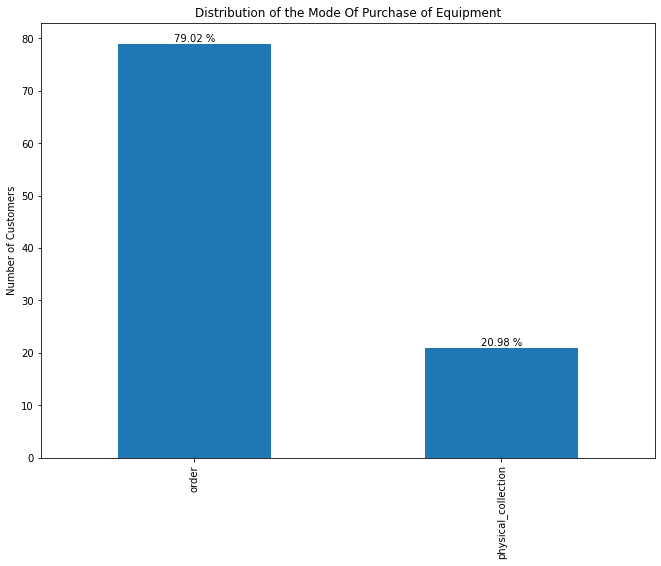

In [8]:
plt.figure(figsize=(11,8))
ax = (df['mode_of_purchase'].value_counts()/len(df['mode_of_purchase'])*100).plot.bar(rot=90)
ax.bar_label(ax.containers[0], fmt='%.2f %%')
ax.margins(x=12)
plt.ylabel('Number of Customers')
plt.title('Distribution of the Mode Of Purchase of Equipment')
plt.show()

#### Most customers prefer to order these sporting equipments than to go to the actual stores to purchase them, with almost 8-% of them ordering the equipment, this could be due to the effect of corona, which made everyone stay home, since the data spans before corona, during lockdown and after lockdown

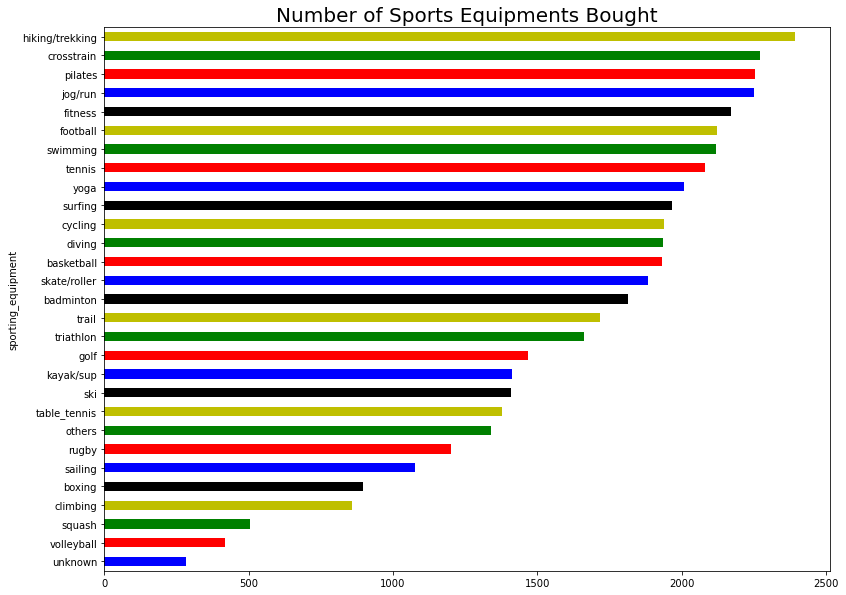

In [9]:
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))
ax=df.groupby('sporting_equipment')['number_of_items_bought'].count().sort_values().plot(kind='barh',figsize=(13,10), color=my_colors)
ax.set_title('Number of Sports Equipments Bought',fontdict={'size':20});

#### The equipment for hiking or trekking were the most purchased, and volley ball equipment were the least purchased
#### The most popular sport in the world, which is football, was the 6th most purchased, with around 2100 of them being bought
#### Basketball, which is the most popular in the US, didnt make the top 10 of most purchased sporting equipment by these customers

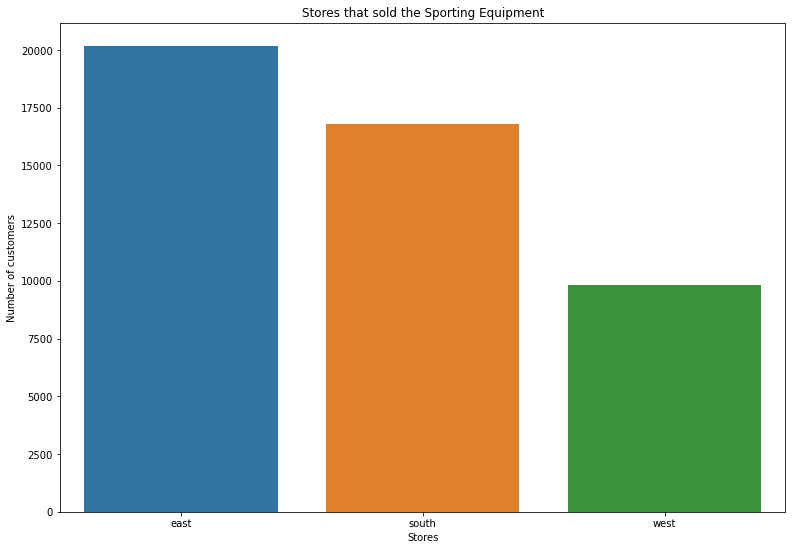

In [10]:
plt.figure(figsize=(13,9))
sns.countplot(x='store', data=df)
plt.xlabel('Stores')
plt.ylabel('Number of customers')
plt.title('Stores that sold the Sporting Equipment');

#### 3 stores sold equipment to customers, with the store on the eastern side selling the most, with around 2000 equipments
#### The west store sold the least, with only under 10000 equipment being sold by this store

In [11]:
df['month']

0         8
1         8
2         8
3         8
4         8
         ..
46758    10
46759    10
46760    10
46761    10
46762    10
Name: month, Length: 46763, dtype: int64

In [12]:
#Creating seasons from the months
df['seasons']=(pd.cut(df['month'], [3,5,8,11,14], labels=['spring','summer','autumn','Winter'], right=False,include_lowest=True))
df['seasons'].value_counts()

autumn    15658
summer    10361
Winter     7051
spring     6899
Name: seasons, dtype: int64

<AxesSubplot:xlabel='seasons'>

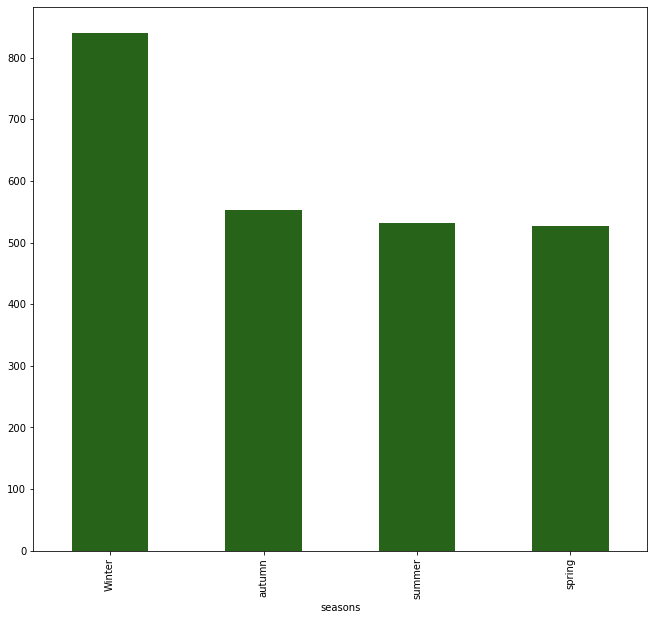

In [13]:
df.groupby('seasons')['estimated_spending'].mean().sort_values(ascending=False).plot(kind='bar',figsize=(11,10),cmap='PiYG_r')

#### Even though winter was the third season with the most purchases, most customers spent on average higher during that season than the other seasons, with a little over 800 dollars being spent
#### Autumn had the most purchases, but on average customers spent under 600 dollars in that season

In [14]:
df.head(3)

,Date,mode_of_purchase,sporting_equipment,store,estimated_spending,number_of_items_bought,month,day,seasons
0,2019-08-01,order,fitness,east,167.1768,7,8,1,autumn
1,2019-08-01,order,jog/run,south,297.5084,8,8,1,autumn
2,2019-08-01,order,pilates,south,150.5168,5,8,1,autumn


<AxesSubplot:xlabel='store'>

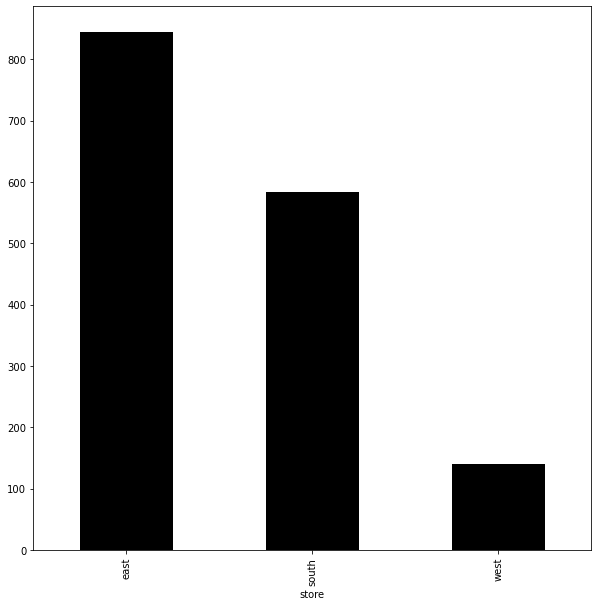

In [15]:
df.groupby('store')['estimated_spending'].mean().sort_values(ascending=False).plot(kind='bar',figsize=(10,10),cmap='nipy_spectral')

#### As the east store made the most purchases, customers also spent the most in that store on average, with about 850 dollars being spent there

In [16]:
#extracting weekday from day of week
df['weekday']=np.where((df['Date'].dt.dayofweek) < 5,'weekday','weekend')

In [17]:
df['weekday'].value_counts()

weekday    33522
weekend    13241
Name: weekday, dtype: int64

In [18]:
df

,Date,mode_of_purchase,sporting_equipment,store,estimated_spending,number_of_items_bought,month,day,seasons,weekday
0,2019-08-01,order,fitness,east,167.176800,7,8,1,autumn,weekday
1,2019-08-01,order,jog/run,south,297.508400,8,8,1,autumn,weekday
2,2019-08-01,order,pilates,south,150.516800,5,8,1,autumn,weekday
3,2019-08-01,order,pilates,east,91.911400,7,8,1,autumn,weekday
4,2019-08-01,physical_collection,diving,west,90.819400,2,8,1,autumn,weekday
...,...,...,...,...,...,...,...,...,...,...
46758,2021-10-31,order,swimming,south,87.588667,4,10,31,autumn,weekend
46759,2021-10-31,order,basketball,south,19.809333,1,10,31,autumn,weekend
46760,2021-10-31,order,triathlon,east,46.942667,1,10,31,autumn,weekend
46761,2021-10-31,order,tennis,south,154.963333,5,10,31,autumn,weekend


<AxesSubplot:xlabel='weekday'>

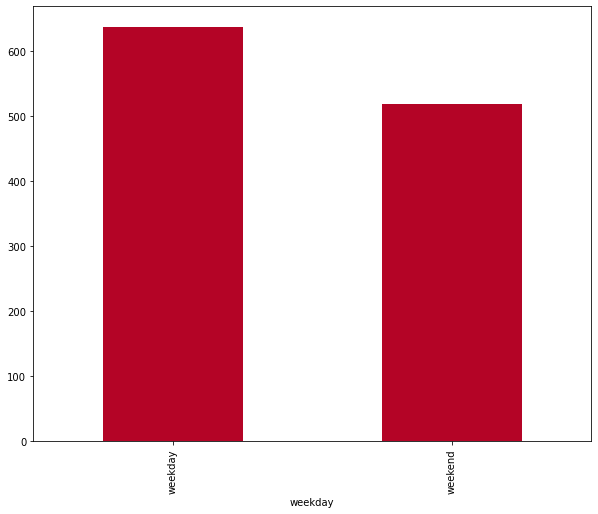

In [19]:
df.groupby('weekday')['estimated_spending'].mean().sort_values(ascending=False).plot(kind='bar',figsize=(10,8),cmap='coolwarm_r')

#### Most customers spent more on weekdays than the weekdays, with around 650 dollars being spent on average on the weekdays, compared to a little over 500 dollars being spent on the weekend, this could be due to the fact that, most people do sporting activties during the weekend, so they prefer buying these equipment ahead of time(during the week), so they dont now have to be running around, looking for the equipment when they really need it on the weekend

In [20]:
df.groupby('weekday')['number_of_items_bought'].mean().sort_values(ascending=False)

weekday
weekday    7.900304
weekend    6.849634
Name: number_of_items_bought, dtype: float64

<AxesSubplot:xlabel='weekday'>

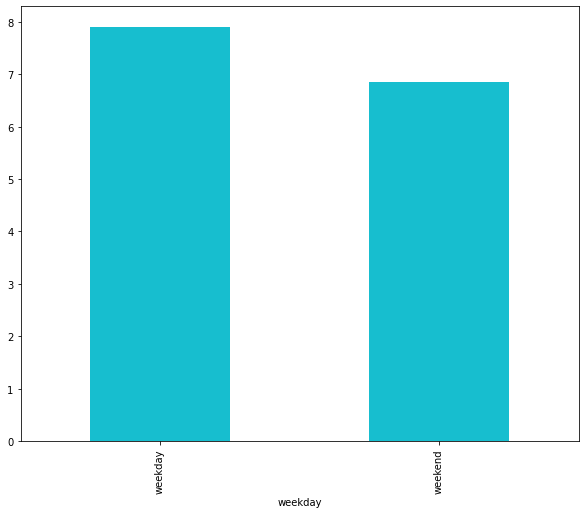

In [24]:
df.groupby('weekday')['number_of_items_bought'].mean().sort_values(ascending=False).plot(kind='bar',figsize=(10,8),cmap='tab10_r')

#### Also, more equipments were sold on average during the week than the weekends, with more equipment being sold 6.9% during the weekday more than in the weekend

In [25]:
df

,Date,mode_of_purchase,sporting_equipment,store,estimated_spending,number_of_items_bought,month,day,seasons,weekday
0,2019-08-01,order,fitness,east,167.176800,7,8,1,autumn,weekday
1,2019-08-01,order,jog/run,south,297.508400,8,8,1,autumn,weekday
2,2019-08-01,order,pilates,south,150.516800,5,8,1,autumn,weekday
3,2019-08-01,order,pilates,east,91.911400,7,8,1,autumn,weekday
4,2019-08-01,physical_collection,diving,west,90.819400,2,8,1,autumn,weekday
...,...,...,...,...,...,...,...,...,...,...
46758,2021-10-31,order,swimming,south,87.588667,4,10,31,autumn,weekend
46759,2021-10-31,order,basketball,south,19.809333,1,10,31,autumn,weekend
46760,2021-10-31,order,triathlon,east,46.942667,1,10,31,autumn,weekend
46761,2021-10-31,order,tennis,south,154.963333,5,10,31,autumn,weekend


In [26]:
#extracting the data before and after corona
df['Corona_effect']=np.where((df['Date']) > '2020-03-10','corona_effect','before_corona')

In [27]:
df.head()

,Date,mode_of_purchase,sporting_equipment,store,estimated_spending,number_of_items_bought,month,day,seasons,weekday,Corona_effect
0,2019-08-01,order,fitness,east,167.1768,7,8,1,autumn,weekday,before_corona
1,2019-08-01,order,jog/run,south,297.5084,8,8,1,autumn,weekday,before_corona
2,2019-08-01,order,pilates,south,150.5168,5,8,1,autumn,weekday,before_corona
3,2019-08-01,order,pilates,east,91.9114,7,8,1,autumn,weekday,before_corona
4,2019-08-01,physical_collection,diving,west,90.8194,2,8,1,autumn,weekday,before_corona


<AxesSubplot:xlabel='Corona_effect'>

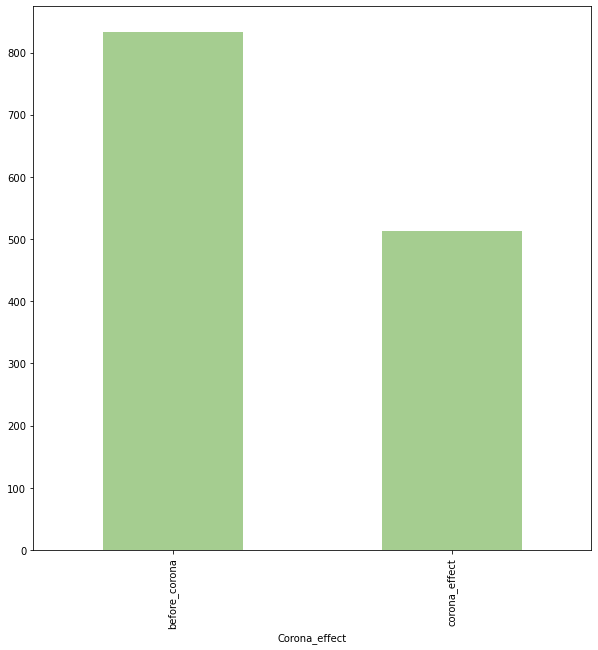

In [28]:
df.groupby('Corona_effect')['estimated_spending'].mean().plot(kind='bar',figsize=(10,10),cmap='crest')

#### As expected, there was more spending before corona occurred, than when it occurred, with customers spending more than twice the amount before corona and after corona

<AxesSubplot:xlabel='Corona_effect'>

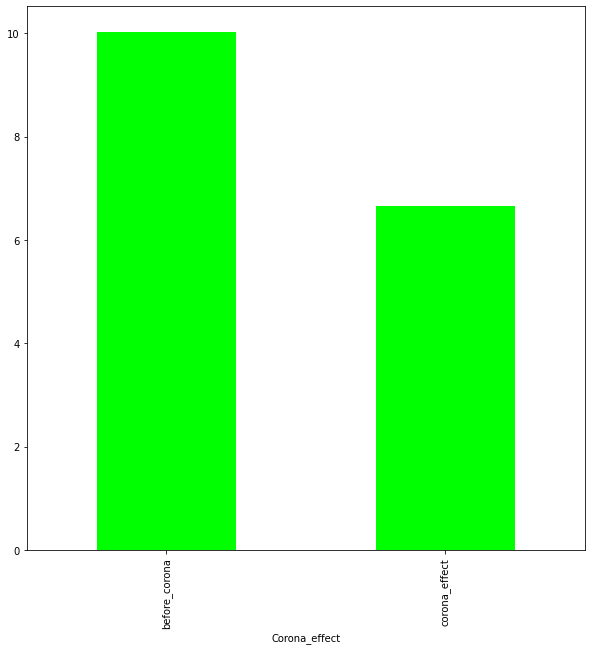

In [29]:
df.groupby('Corona_effect')['number_of_items_bought'].mean().plot(kind='bar',figsize=(10,10),cmap='brg_r')

#### Also, more number of items were bought before corona than after corona, with 10 items being bought on average, and about 6 items being bought after corona,

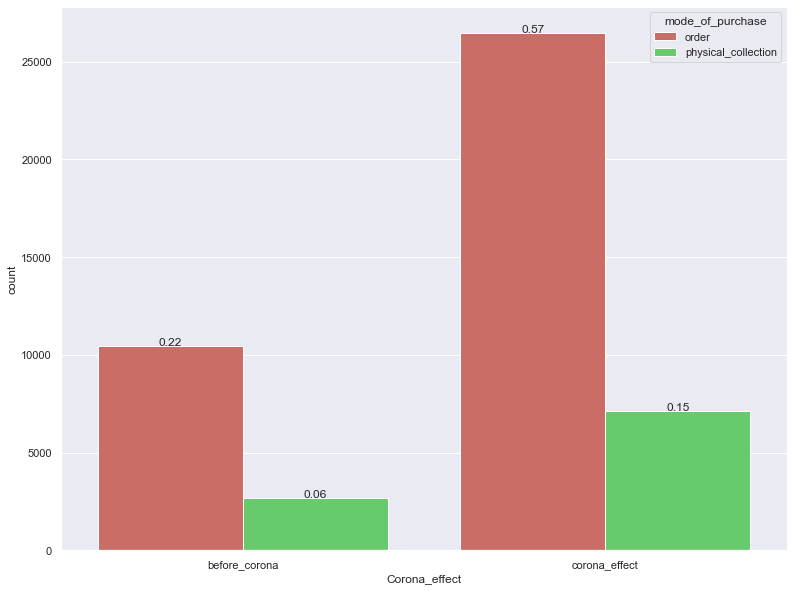

In [30]:
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(13,10))
ax = sns.countplot(x="Corona_effect", hue="mode_of_purchase", data=df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/df.shape[0]),
            ha="center")

#### As expected, 57% of all purchases were done online(delivery) after corona, with only 22% being done before corona, as the social distancing protocol was implemented in all areas, people just order their equipment, and its delivered to them